In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
!pip install xgboost

import xgboost as xgb 

In [ ]:
from sklearn import metrics 

Data Collection & Analysis 

In [ ]:
from xgboost import XGBRegressor 

In [ ]:
#loading the dataset from csv file 
bigmartdata = pd.read_csv('Train.csv')

In [ ]:
bigmartdata.head()

In [ ]:
bigmartdata.shape

In [ ]:
bigmartdata.isnull().sum()  

In [ ]:
# gettiong information 
bigmartdata.info()

Categoricxal featurae 
- Item_Identifier
-  Item_Fat_Content  
- Item_Type                 
- Outlet_Identifier   
- Outlet_Size               
- Outlet_Location_Type      
- Outlet_Type               


handling missing value 
- mean for numeric data 
- mode for categorical data 

In [ ]:
bigmartdata['Item_Weight'].mean()

In [ ]:
bigmartdata['Item_Weight'].fillna(bigmartdata['Item_Weight'].mean(), inplace=True)


In [ ]:
mode_outletsize = bigmartdata.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [ ]:
mode_outletsize

In [101]:
missing_values = bigmartdata['Outlet_Size'].isnull()
missing_values

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [ ]:
bigmartdata.loc[missing_values, 'Outlet_Size'] = bigmartdata.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_outletsize[x]) 

In [ ]:
bigmartdata.isnull().sum()

DATA ANALYSIS 

In [ ]:
bigmartdata.describe()

In [ ]:
sns.set()

In [ ]:
plt.Figure(figsize=(10, 6))
sns.countplot(x='Outlet_Type', data=bigmartdata)

In [ ]:
sns.displot(bigmartdata['Item_Outlet_Sales'], kde=True)

In [ ]:
sns.displot(bigmartdata['Item_Visibility'], kde=True)

In [ ]:
sns.displot(bigmartdata['Item_Weight'], kde=True)

In [ ]:
plt.Figure(figsize=(6, 6))

sns.countplot(x='Outlet_Establishment_Year', data=bigmartdata)
plt.show()


In [ ]:
plt.Figure(figsize=(6, 6))

sns.countplot(x='Item_Fat_Content', data=bigmartdata)
plt.show()

In [ ]:
plt.Figure(figsize=(10, 10))

sns.countplot(x='Item_Type', data=bigmartdata)
plt.show()

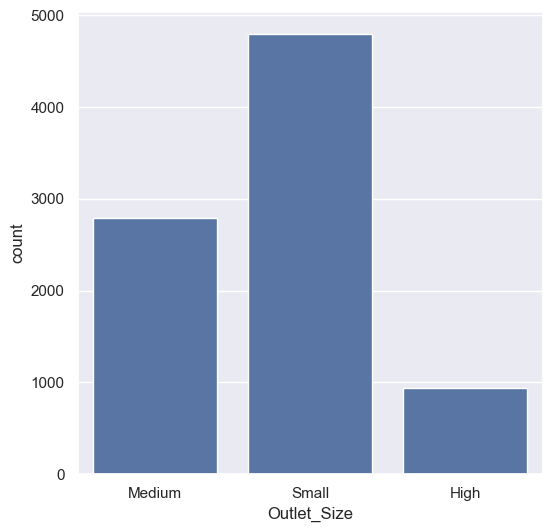

In [102]:
plt.figure(figsize=(6, 6))

sns.countplot(x='Outlet_Size', data=bigmartdata)
plt.show()

In [ ]:
bigmartdata.info()

In [ ]:
bigmartdata

In [103]:
bigmartdata['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

DATA PREPROCCESING 

In [104]:
bigmartdata['Item_Fat_Content'] = bigmartdata['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})

In [105]:
bigmartdata['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

Label Encoding 

In [106]:
encoder = LabelEncoder()

In [107]:
bigmartdata['Item_Identifier'] = encoder.fit_transform(bigmartdata['Item_Identifier'])  

In [108]:
bigmartdata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,662,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,1121,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,1297,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [110]:
bigmartdata['Item_Fat_Content'] = encoder.fit_transform(bigmartdata['Item_Fat_Content']) 

bigmartdata['Item_Type'] = encoder.fit_transform(bigmartdata['Item_Type']) 

bigmartdata['Outlet_Identifier'] = encoder.fit_transform(bigmartdata['Outlet_Identifier']) 

bigmartdata['Outlet_Size'] = encoder.fit_transform(bigmartdata['Outlet_Size']) 

bigmartdata['Outlet_Location_Type'] = encoder.fit_transform(bigmartdata['Outlet_Location_Type'])


bigmartdata['Outlet_Type'] = encoder.fit_transform(bigmartdata['Outlet_Type']) 

In [111]:
bigmartdata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Spllitintg features and targets 

In [112]:
X = bigmartdata.drop(columns=['Item_Outlet_Sales'], axis=1)
Y = bigmartdata['Item_Outlet_Sales']

In [113]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [114]:
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [115]:
# checking the data types of the columns
bigmartdata.dtypes

Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

splitting data in training and test 

In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [118]:
X_train.shape

(6818, 11)

In [119]:
X.shape

(8523, 11)

In [120]:
X_test.shape

(1705, 11)

Training ML Model 

In [121]:
reg = XGBRegressor()

In [122]:
reg.fit(X_train,Y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [123]:
training_data_pred = reg.predict(X_train)

In [124]:
r2_train = metrics.r2_score(Y_train , training_data_pred)

In [125]:
r2_train

0.8762174618111388

In [126]:
# for testing data 
pred = reg.predict(X_test)

In [127]:
r2_test =  metrics.r2_score( Y_test , pred)

In [128]:
r2_test

0.5017253991620692